<p><img alt="UDLA logo" height="150px" src="https://www.uao.edu.co/wp-content/uploads/2022/06/Logo-nuevo-acreditación.png"  align="center" hspace="5px" vspace="5px"></p>

#<ins>**Proyecto final Gestión y almacenamiento de datos.**</ins>

*Notebook de manipulación de de datos*

##**Estudiantes:**

*****Natasha Hoyos Código 2241007*****

*****Sergio Márquez Código 2241010*****

*****Carlos Adolfo Restrepo Código 2241006*****

###1. lectura de la BD depurada


In [1]:
#Se importan las librerias
import pandas as pd # para análisis de datos
import numpy as np #Operaciones matemáticas, además trabaja de la mano con matplotlib y seaborn
import matplotlib.pyplot as plt #Para gráficar
import seaborn as sns #Para gráficar
import csv



In [2]:
#Se carga la base de datos desde archivo Excel
df_limpio4 = pd.read_excel("/content/DepuracionFinal.xlsx")



In [ ]:
#Se carga la base de datos desde CSV
#df= pd.read_csv("/content/BDlimpiaCSV.csv")

#df_limpio4=pd.DataFrame(df)
#df_limpio4['Fecha'] = pd.to_datetime(df_limpio4['Fecha'], errors='coerce')

In [ ]:
df_limpio4

### 2. Funciones para visualización de datos


In [3]:
#Se crean columnas de mes y año, necesarias para agrupar datos

df_limpio4['mes'] = df_limpio4['Fecha'].dt.month
df_limpio4['año'] = df_limpio4['Fecha'].dt.year

In [ ]:
# Función para calcular promedio ponderado

def promedio_ponderado(group):
    suma_productos = (group['Rentabilidad'] * group['Valor venta']).sum()
    suma_pesos = group['Valor venta'].sum()
    return suma_productos / suma_pesos

# Agrupar por fecha y calcular el promedio ponderado para cada grupo
prom_pond_por_mes = df_limpio4.groupby(['mes']).apply(promedio_ponderado)
prom_pond_por_año = df_limpio4.groupby(['año']).apply(promedio_ponderado)
#print(prom_pond_por_mes)
#print(prom_pond_por_año)

In [ ]:
# Función para gráficar la rentabilidad anual

def renta_anual():
  sns.set_theme(style="darkgrid")
  sns.lineplot(x=prom_pond_por_año.index, y=prom_pond_por_año.values*100 )
  plt.xlabel('Años')
  plt.ylabel('Rentabilidad %')
  plt.title('Rentabilidad promedio por año')
  return


In [ ]:
# Función para gráficar el total de ventas anual

def venta_anual():
  Ventas_por_año = df_limpio4[df_limpio4['año']<2024].groupby(['año'])['Valor venta'].sum()

  sns.set_theme(style="ticks", palette="pastel")
  plt.figure()
  sns.lineplot(x=Ventas_por_año.index,y=Ventas_por_año.values/1000000)
  plt.title('Ventas totales por año')
  plt.xlabel('Fecha')
  plt.ylabel('Ventas (millones COP)')
  return


In [4]:
# Agrupaciones de información para crear las graficas de ventas 2016 vs 2023.

Ventas_2023 = df_limpio4[df_limpio4['año']==2023] #Se genera un dataset con ventas del 2023
sectores= Ventas_2023['Sector'].unique()

Ventas_2016 = df_limpio4[df_limpio4['año']==2016] #Se genera un dataset con ventas del 2016
sectores_2= Ventas_2016['Sector'].unique()

#Se suman las ventas por sector en el año 2023
ventas =np.empty((10, 1))

for i in range(len(sectores)):

  ventas[i]=Ventas_2023[Ventas_2023['Sector']==sectores[i]]['Valor venta'].sum()

#Se promedia la rentabilidad por sector en el año 2023
rent =np.empty((10, 1))

for i in range(len(sectores)):

  rent[i]=Ventas_2023[Ventas_2023['Sector']==sectores[i]]['Rentabilidad'].mean()

#Se suman las ventas por sector en el año 2016
ventas_2 =np.empty((11, 1))



for i in range(len(sectores)):

  ventas_2[i]=Ventas_2016[Ventas_2016['Sector']==sectores_2[i]]['Valor venta'].sum()

#Se promedia la rentabilidad por sector en el año 2016
rent_2 =np.empty((11, 1))

for i in range(len(sectores_2)):

  rent_2[i]=Ventas_2016[Ventas_2016['Sector']==sectores_2[i]]['Rentabilidad'].mean()


In [5]:
# Función para gráficar las ventas por sector del año 2016 vs. 2023
def ventas1623():

  plt.figure(figsize=(15,8))
  sns.set_theme(style="darkgrid")
  plt.subplot(3,2,1 )
  sns.lineplot(x = (sectores.reshape(-1)), y = ((ventas/1000000).reshape(-1)),color="blue")
  plt.title('Ventas por sector, año 2023')
  plt.xlabel('Sectores')
  plt.ylabel('Ventas en millones (COP)')
  plt.xticks(rotation=90)

  plt.subplot(3,2,2 )
  sns.lineplot(x=((sectores_2).reshape(-1)),y=((ventas_2/1000000).reshape(-1)), color="blue")
  plt.title('Ventas por sector, año 2016')
  plt.xlabel('Sectores')
  plt.ylabel('Ventas en millones (COP)')
  plt.xticks(rotation=90)

  plt.subplot(3,2,5)
  sns.lineplot(x = (sectores.reshape(-1)),y=((rent*100).reshape(-1)),color="red")
  plt.title('Rentabilidad por sector, año 2023')
  plt.xlabel('Sectores')
  plt.ylabel('Rentabilidad (%)')
  plt.xticks(rotation=90)

  plt.subplot(3,2,6)
  sns.lineplot(x= ((sectores_2).reshape(-1)),y= ((rent_2*100).reshape(-1)), color="red")
  plt.title('Rentabilidad por sector, año 2016')
  plt.xlabel('Sectores')
  plt.ylabel('Rentabilidad (%)')
  plt.xticks(rotation=90)

  plt.show() #cierra la línea de código de la figura

  return

In [6]:
def pastel2023():
 colores = sns.color_palette('tab20')[0:11]
  plt.pie(((ventas).reshape(-1)), labels= ((sectores).reshape(-1)),
          colors=colores,
          autopct='%.0f%%',
          wedgeprops={"linewidth": 1, "edgecolor": "white"},
          startangle=15,
          rotatelabels = False,

          textprops={'fontsize': 10},
          radius=10
          )
  plt.axis('equal')
  plt.title('Ventas por sector, año 2023')
  return

###3. Visualización de datos

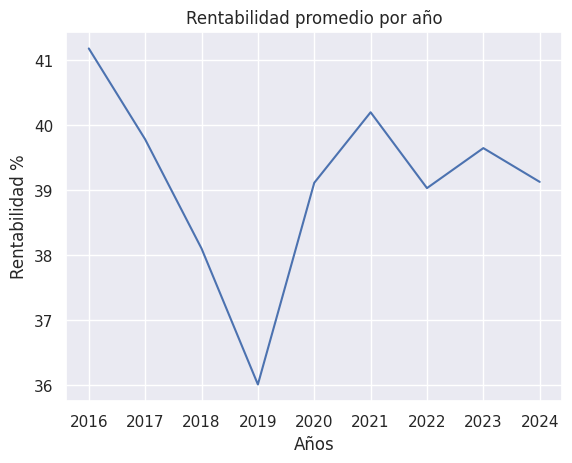

In [ ]:
renta_anual()


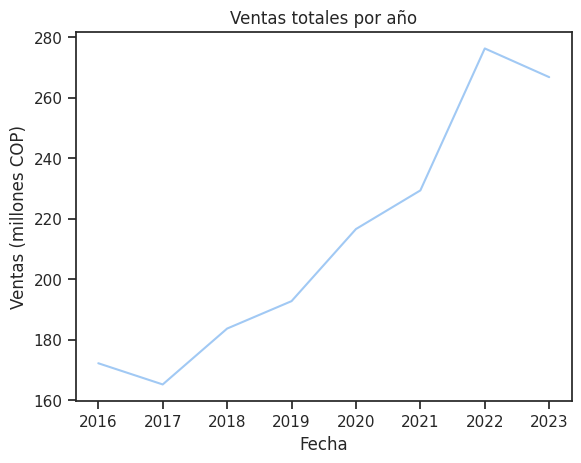

In [ ]:
venta_anual()

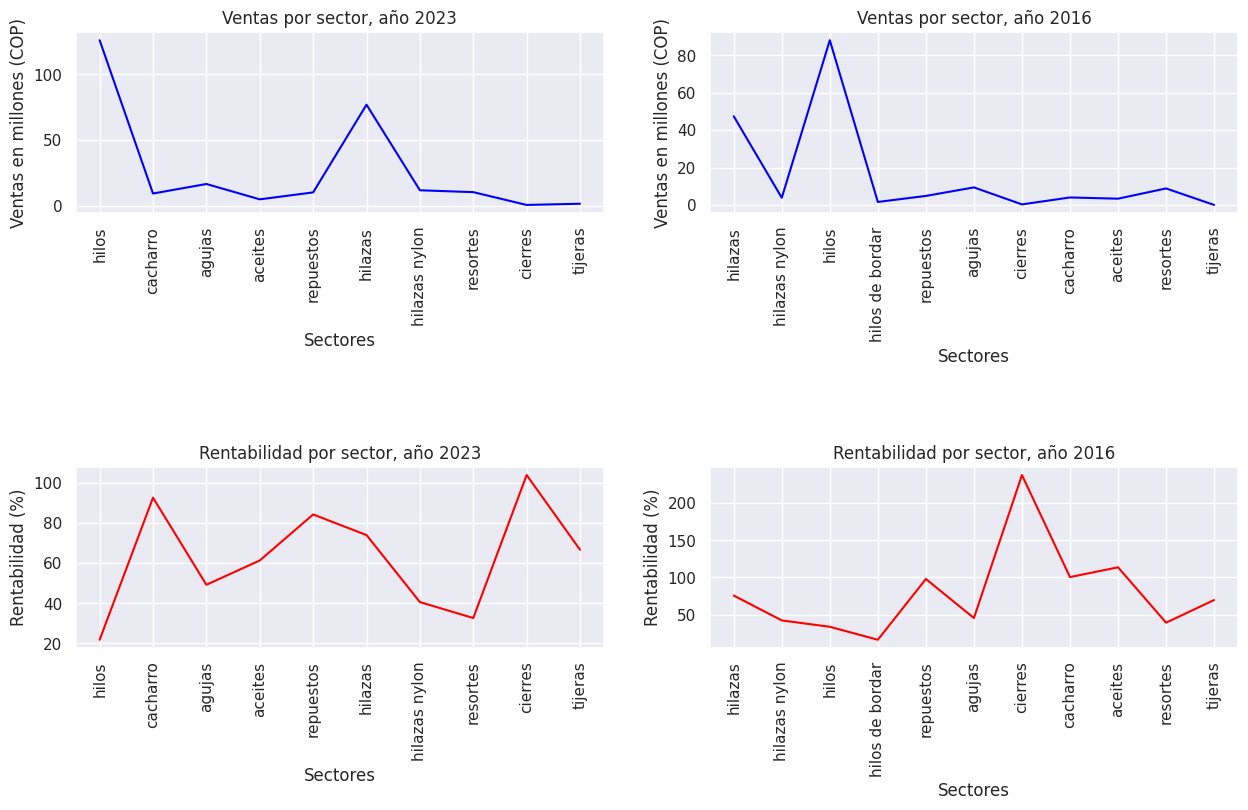

In [ ]:
ventas1623()

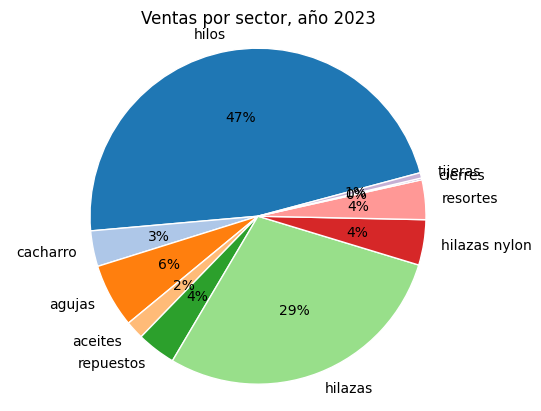

In [7]:
pastel2023()